# What's the performance of QAOA on small graphs?

Let's load the data we have with QAOAKit. We have the performance of QAOA for $p=1,2,3$ on all graphs of at most $9$ nodes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
from QAOAKit import get_full_qaoa_dataset_table

df = get_full_qaoa_dataset_table().reset_index()
print(f"Dataset contains {len(df)} instances")

Dataset contains 819573 instances


With QAOAKit, we can easily compute the average degree and cut fraction of each graph.

In [3]:
df['average degree'] = df.apply(lambda row: 2*row['G'].number_of_edges() / row['G'].number_of_nodes(), axis=1)
df['num edges'] = df.apply(lambda row: row['G'].number_of_edges(), axis=1)
df['cut fraction'] = df.apply(lambda row: row['C_opt']/row['num edges'], axis=1)
df['approx ratio'] = df.apply(lambda row: row['C_opt'] / row['C_{true opt}'], axis=1)

How does the performance of $p=1$ QAOA change with the average degree?

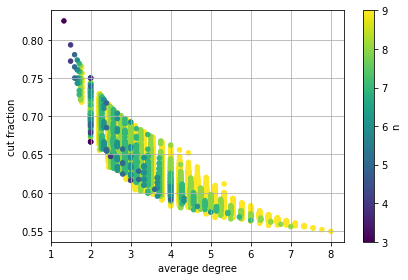

In [4]:
fig, ax = plt.subplots()
df[df['p'] == 1][::-1].plot(x='average degree', y='cut fraction', kind='scatter', ax=ax,c='n', colormap='viridis')
plt.grid()
fig.tight_layout()
plt.savefig('cutfraction_by_degree.png')

As expected, increasing the average degree will make the $p=1$ cut fraction tend towards $1/2$. Also, for each $n$, as the average degree increases, so does the number of triangles, which reduces the optimal cut fraction. In the extreme case, a clique has an optimal cut fraction of $1/2 + O(1/D)$.

What about as $p$ varies?

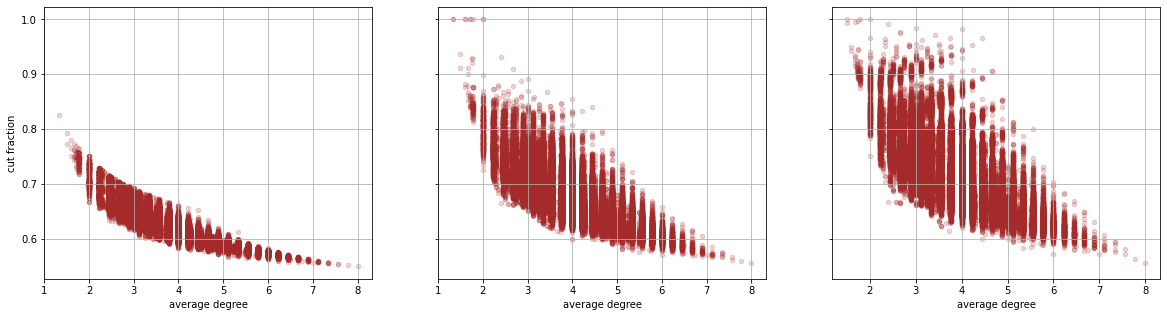

In [5]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 5), sharey=True)
for i in range(3):
    df[df['p'] == i+1].plot(x='average degree', y='cut fraction', kind='scatter', ax=ax[i], alpha=0.2, c='brown')
    ax[i].grid()

At higher $p$, the QAOA performs better, but there is overlap. This may be because the optimal cut fraction may not be that large. For example, in the right corner, the optimal cut fraction for the clique ($D=8$) is nearly achieved by all depths of the QAOA.

Let's instead plot the approximation ratios.

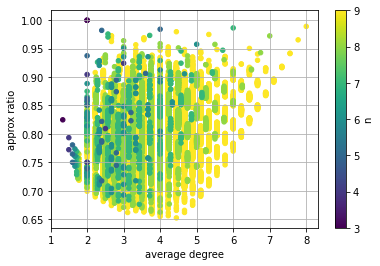

In [6]:
fig, ax = plt.subplots()
df[df['p'] == 1][::-1].plot(x='average degree', y='approx ratio', kind='scatter', ax=ax,c='n', colormap='viridis')
plt.grid()

There are graphs at each $n$, that even at $p=1$, we can achieve nearly the optimal cut fraction.

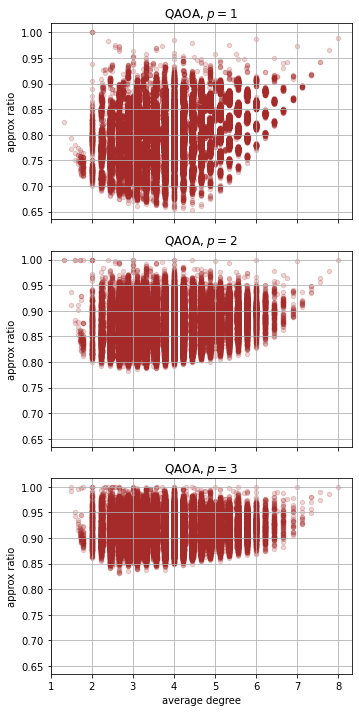

In [7]:
fig, ax = plt.subplots(nrows=3, figsize=(5, 10), sharex=True, sharey=True)
for i in range(3):
    df[df['p'] == i+1].plot(x='average degree', y='approx ratio', kind='scatter', ax=ax[i], alpha=0.2, c='brown')
    ax[i].grid()
    ax[i].set_title('QAOA, $p=' + str(i+1) + '$')
fig.tight_layout()
plt.savefig('qaoa_by_p.png')

As $p$ increases, more and more graphs are achieving the optimal approximation ratio. Also, the worst-case approximation ratio improves from about $0.65$ to about $0.825$ as $p$ goes from $1$ to $3$.

That's all for now. QAOAKit makes it much easier to explore the data on the QAOA's performance.